In [ ]:
""" 
  This is the classification Of Flower ( Daisy, Dandelion, Rose, Sunflower, Tulip ) using keras
 
  Dataset used in project link : https://drive.google.com/file/d/1pmGSSgdNm7s_0dgf3WkivX_qje48rOs1/view?usp=sharing
 
  This dataset is extracted and arranged from Kaggle
  Kaggle Link: https://www.kaggle.com/alxmamaev/flowers-recognition
 
"""

In [ ]:
#Importing Libraries

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import random
from tqdm import tqdm
import cv2
import pandas as pd
from keras.models import Sequential, load_model, save_model


Using TensorFlow backend.


In [ ]:
#importing library for mounting google drive

from google.colab import drive,files
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
#Extracting the zip file

import zipfile

dataset="/content/drive/My Drive/Colab Notebooks/flowers_train.zip"
with zipfile.ZipFile(dataset,'r') as z:
  z.extractall()

In [ ]:
ls

daisy/  dandelion/  drive/  rose/  sample_data/  sunflower/  tulip/


In [ ]:
#Path for every flowers separated by class

train_path=["./daisy/","./dandelion/","./rose/","./sunflower/","./tulip/"]

#Class Names
flw_names=["daisy","dandelion","rose","sunflower","tulip"]

img_size=64,64              #Image size using for NN

train_img_label=[]
img_name=[]
train_img=[]


In [ ]:
def create_dataset():
  for num,path in enumerate(train_path):
    for file in tqdm(os.listdir(path)):
      img_name.append(os.path.join(path,file))
      train_img_label.append(flw_names[num])
      img = cv2.imread(os.path.join(path,file))
      img = cv2.resize(img,img_size)
      train_img.append(img)
  return train_img

In [ ]:
#Creating Dataset and converting it in numpy

train_data=np.array(create_dataset())

100%|██████████| 984/984 [00:02<00:00, 451.82it/s]


In [ ]:
print(train_data.shape)

(4323, 64, 64, 3)


In [ ]:
#Dividing the dataset by 255.0 and changeing variable type to float32

train_data = train_data.astype('float32') / 255.0

In [ ]:
# extract lables from train dataset and arranging the format from (0,1) to (0=daisy,1=dandelion,2=rose,3=sunflower,4=tulip)
label_dummies = pd.get_dummies(train_img_label)
print(label_dummies)
labels =  label_dummies.values.argmax(1)
print(labels)

      daisy  dandelion  rose  sunflower  tulip
0         1          0     0          0      0
1         1          0     0          0      0
2         1          0     0          0      0
3         1          0     0          0      0
4         1          0     0          0      0
...     ...        ...   ...        ...    ...
4318      0          0     0          0      1
4319      0          0     0          0      1
4320      0          0     0          0      1
4321      0          0     0          0      1
4322      0          0     0          0      1

[4323 rows x 5 columns]
[0 0 0 ... 4 4 4]


In [ ]:
#len(train_img_label)
type(train_data)
#print(len(labels))

numpy.ndarray

In [ ]:

# Shuffle the labels and images randomly for better results

union_list = list(zip(train_data, labels))          #first concatenating train_data and labels and converting it into list
random.shuffle(union_list)                          #shuffling the data  
train_data,labels = zip(*union_list)                #again dividing dataset into train_data and labels

In [ ]:
# Convert the shuffled list to numpy array type
train = np.array(train_data)                      
labels = np.array(labels)

print(len(train))

4323


In [ ]:
#designing the model or neural network's structure

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (64,64,3)),
    keras.layers.Dense(256,activation = tf.nn.relu),
    keras.layers.Dense(128,activation = tf.nn.relu),
    keras.layers.Dense(64,activation = tf.nn.relu),
    tf.keras.layers.Dropout(0.25),
    keras.layers.Dense(5,activation = tf.nn.softmax)
])

In [ ]:
# putting model's parameters and compiling it
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#create dataset for validation or testing

test_data=train
test_labels=labels

In [ ]:
#filling the dataset into model
model.fit(train,labels,epochs = 80)


#testing model with test dataset
model.evaluate(test_data,test_labels)

Epoch 1/80
136/136 [==============================] - 3s 21ms/step - loss: 1.6712 - accuracy: 0.3218
Epoch 2/80
136/136 [==============================] - 3s 22ms/step - loss: 1.3957 - accuracy: 0.3708
Epoch 3/80
136/136 [==============================] - 3s 22ms/step - loss: 1.3325 - accuracy: 0.4161
Epoch 4/80
136/136 [==============================] - 3s 22ms/step - loss: 1.3201 - accuracy: 0.4192
Epoch 5/80
136/136 [==============================] - 3s 21ms/step - loss: 1.2362 - accuracy: 0.4622
Epoch 6/80
136/136 [==============================] - 3s 21ms/step - loss: 1.2812 - accuracy: 0.4365
Epoch 7/80
136/136 [==============================] - 3s 21ms/step - loss: 1.2039 - accuracy: 0.4786
Epoch 8/80
136/136 [==============================] - 3s 21ms/step - loss: 1.1959 - accuracy: 0.4816
Epoch 9/80
136/136 [==============================] - 3s 21ms/step - loss: 1.1691 - accuracy: 0.4844
Epoch 10/80
136/136 [==============================] - 3s 21ms/step - loss: 1.1477 - accura

[0.10515785217285156, 0.9602128267288208]

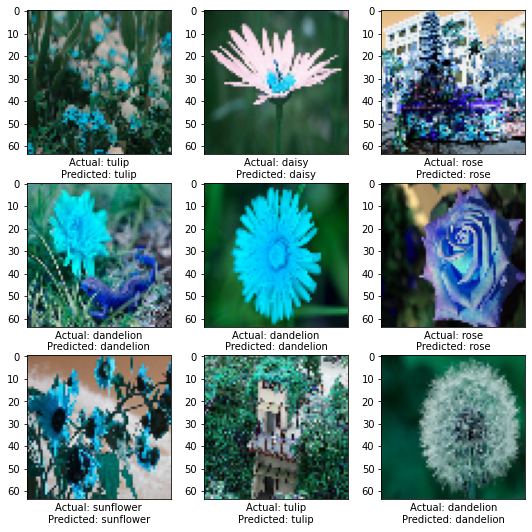

In [ ]:
#Validation Section 1

prediction=model.predict(test_data)
plt.figure(figsize=(9,9))
for i in range(9):
	plt.subplot(3,3,i+1)
	plt.imshow(test_data[i])
	plt.xlabel('Actual: '+flw_names[test_labels[i]]+'\n'+'Predicted: '+flw_names[np.argmax(prediction[i])])

	plt.xticks([])

plt.show()

In [ ]:
#Validation Section 2
"""
def upload_img():
  uploaded = files.upload()
  for fn in uploaded.keys():
    return fn
"""

'\ndef upload_img():\n  uploaded = files.upload()\n  for fn in uploaded.keys():\n    return fn\n'

In [ ]:
"""
from keras.preprocessing import image

img=upload_img()
img = image.load_img(img, target_size=(64,64,3))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=np.argmax(model.predict(img))

print(flw_names[result])
plt.show()

"""

'\nfrom keras.preprocessing import image\n\nimg=upload_img()\nimg = image.load_img(img, target_size=(64,64,3))\nplt.imshow(img)\nimg = np.expand_dims(img, axis=0)\nresult=np.argmax(model.predict(img))\n\nprint(flw_names[result])\nplt.show()\n\n'